In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline

In [295]:
data=sio.loadmat("./features_2015.mat")

In [296]:
pdata=data['pdata']

In [297]:
material=pdata[:,3]

In [298]:
pdata_AC=pdata[material==21]

In [299]:
pdata_AC=pdata_AC[:,(0,1,6)]

In [300]:
pdata_AC.shape

(29976, 2)

In [301]:
pdata_AC=pdata_AC.astype(np.int32)

In [302]:
faildata=sio.loadmat("./pfail1512.mat")

In [303]:
fail=pd.DataFrame(faildata['pfail1512'][:,(0,3)],columns=['sgan','fail_year'])

In [304]:
fail.head()

,sgan,fail_year
0,2614254,2000
1,2482317,2000
2,2617953,2000
3,2464350,2000
4,2520542,2000


In [305]:
AC=pd.DataFrame(pdata_AC, columns=['sgan','laid_year'])

In [306]:
AC.head()

,sgan,laid_year
0,2401929,1996
1,2399205,1996
2,2401925,1996
3,2833759,1998
4,2833763,1998


In [307]:
AC.shape

(29976, 2)

In [308]:
AC_age=pd.DataFrame(np.array(2000-AC['laid_year']),columns=['observe_age'])

In [309]:
AC_age['age']=np.array(2016-AC['laid_year'])

In [310]:
AC_age=pd.concat([AC,AC_age],axis=1)

In [311]:
AC_age.sort_values(by=['age'])

,sgan,laid_year,observe_age,age
28395,10695098,2014,-14,2
17107,10707395,2014,-14,2
29395,10766687,2014,-14,2
17109,10707399,2014,-14,2
17110,10707384,2014,-14,2
17512,10696546,2014,-14,2
17513,10696696,2014,-14,2
17514,10696678,2014,-14,2
24100,10675830,2014,-14,2
24104,10696442,2014,-14,2


In [312]:
AC_age.shape

(29976, 4)

In [313]:
AC_full=pd.merge(fail, AC, how='inner', on=['sgan'])

In [314]:
AC_full.head()

,sgan,fail_year,laid_year
0,2832239,2000,1999
1,2847920,2000,2000
2,2847554,2000,1999
3,2420265,2001,1992
4,2420265,2011,1992


In [315]:
AC_full['fail_age']=AC_full['fail_year']-AC_full['laid_year']

In [316]:
fail_age_negtive=AC_full.ix[AC_full['fail_age']<0,:]

In [317]:
AC_full.ix[AC_full['fail_age']<0,'fail_age']=0

In [318]:
AC_full.sort_values(by=['fail_age','laid_year']).head()

,sgan,fail_year,laid_year,fail_age
1,2847920,2000,2000,0
24,2847912,2000,2000,0
824,4811870,2000,2000,0
1189,8138727,2000,2000,0
1192,4798091,2000,2000,0


In [319]:
AC_full.shape

(1668, 4)

[[0, 64, 17242, 0.0037118663728105787],
 [1, 108, 19607, 0.00550823685418473],
 [2, 99, 21368, 0.004633096218644703],
 [3, 95, 22779, 0.004170507923965056],
 [4, 72, 23624, 0.0030477480528276328],
 [5, 75, 24334, 0.0030821073395249443],
 [6, 84, 25100, 0.003346613545816733],
 [7, 98, 25882, 0.003786415269299127],
 [8, 102, 26436, 0.003858374943259192],
 [9, 145, 26065, 0.005563015538077882],
 [10, 111, 25420, 0.004366640440597955],
 [11, 96, 24182, 0.003969894963195765],
 [12, 83, 22245, 0.003731175545066307],
 [13, 71, 20439, 0.003473751161994227],
 [14, 53, 18809, 0.0028177999893667927],
 [15, 55, 16769, 0.0032798616494722405],
 [16, 47, 14830, 0.003169251517194875],
 [17, 46, 12689, 0.003625187169989755],
 [18, 48, 10324, 0.004649360712901976],
 [19, 34, 8563, 0.003970571061543852],
 [20, 21, 6930, 0.0030303030303030303],
 [21, 25, 5612, 0.004454739843193158],
 [22, 12, 4358, 0.0027535566773749425],
 [23, 10, 3111, 0.0032144005143040825],
 [24, 4, 1958, 0.0020429009193054137],
 [25,

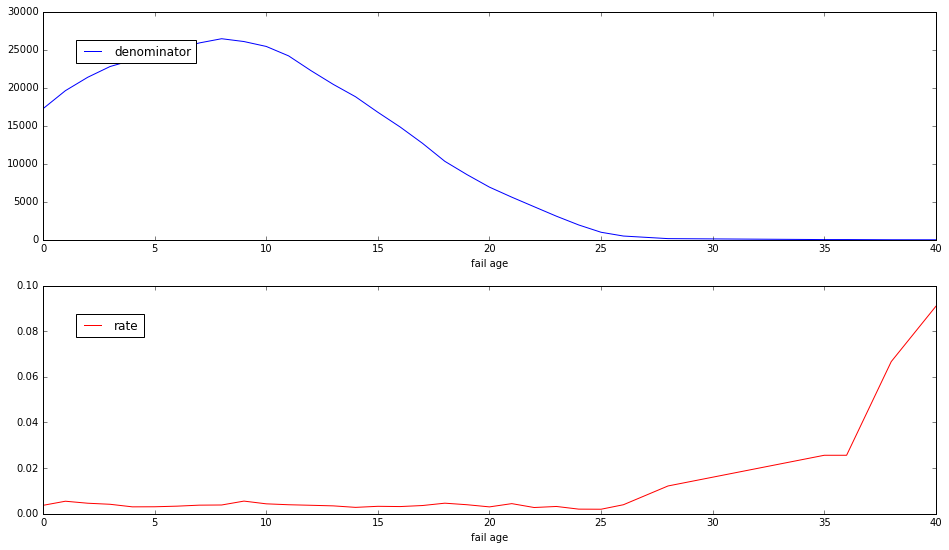

In [320]:
def fail_rate_fail_age(material_full, material_age):
    fail_rate_res=[]
    rng=list(np.unique(material_full['fail_age']))
    for i in rng: #i is fail_age
        material_full_i = material_full[material_full['fail_age']==i]
        material_age_i = material_age[(material_age['observe_age']<=i) & (material_age['age']>=i)]
        fail_rate_res.append([i, len(material_full_i),  len(material_age_i), len(material_full_i)/len(material_age_i)])
    fail_rate_res_arr=np.array(fail_rate_res)
    fig=plt.figure(figsize=(16,9))
    ax1=fig.add_subplot(2,1,1)
    ax1.plot(fail_rate_res_arr[:,0],fail_rate_res_arr[:,2],'b-',label='denominator')
    ax1.set_xlabel('fail age')
    plt.legend(loc='upper left', bbox_to_anchor=(0.03,0.9))
    #plt.xticks(rng)
    plt.tight_layout
    
    ax2=fig.add_subplot(2,1,2)
    ax2.plot(fail_rate_res_arr[:,0],fail_rate_res_arr[:,3],'r-',label='rate')
    ax2.set_xlabel('fail age')
    plt.legend(loc='upper left', bbox_to_anchor=(0.03,0.9))
    #plt.xticks(rng)
    plt.tight_layout
    
    
    fig.savefig('c:/Users/zhouf/Desktop/sample.png',dpi=600)
    return fail_rate_res

fail_rate_fail_age(AC_full, AC_age)